<a href="https://colab.research.google.com/github/supsi-dacd-isaac/TeachDecisionMakingUncertainty/blob/main/L01/convex_opt_animations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Interactive Convexity Illustration

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

# Define the two functions:
def f1(x):
    """Convex function: f(x)=x^2."""
    return x**2

def f2(x):
    """
    Function with a sigmoid and a small quadratic term:
    f(x)=1/(1+exp(-x+3)) + 0.005*x^2.
    """
    return 1/(1+np.exp(-x+3)) + 0.005*x**2

def plot_convexity(t=0.5):
    """
    For each function, plot:
      - The function curve.
      - The endpoints at x1=-2 and x2=2.
      - The chord joining (x1,f(x1)) and (x2,f(x2)).
      - The point x_bar = t*x1 + (1-t)*x2,
        with its chord value t*f(x1)+(1-t)*f(x2) (red)
        and the actual f(x_bar) (green).
    """
    # Define the endpoints.
    x1, x2 = -1, 10
    # Use the convex combination as given:
    x_bar = t*x1 + (1-t)*x2

    # Prepare a common grid for plotting.
    xs = np.linspace(-10, 10, 400)

    # Set up two subplots side by side.
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Loop over the two functions.
    for ax, f, title in zip(axes, [f1, f2],
                              [r'$f(x)=x^2$', r'$f(x)=\frac{1}{1+e^{-x+3}}+0.005x^2$']):
        # Plot the function.
        ax.plot(xs, f(xs), 'b-', lw=2, label=title)
        # Mark the endpoints.
        ax.plot(x1, f(x1), 'ko', markersize=8, label='Endpoints')
        ax.plot(x2, f(x2), 'ko', markersize=8)
        # Draw the chord connecting the endpoints.
        ax.plot([x1, x2], [f(x1), f(x2)], 'k--', lw=2, label='Chord')

        # Compute the chord value and the function value at x_bar.
        chord_val = t*f(x1) + (1-t)*f(x2)
        func_val  = f(x_bar)

        # Plot the chord value (red) and the function value (green) at x_bar.
        ax.plot(x_bar, chord_val, 'ro', markersize=8,
                label=r'Chord: $t\,f(x_1)+(1-t)\,f(x_2)$')
        ax.plot(x_bar, func_val, 'go', markersize=8,
                label=r'$f(t\,x_1+(1-t)x_2)$')

        # Draw a vertical line connecting the two markers.
        ax.plot([x_bar, x_bar], [func_val, chord_val], 'r-', lw=2)

        # Labeling.
        ax.set_xlabel('x')
        ax.set_ylabel('f(x)')
        ax.set_title(title)
        ax.legend(loc='upper left', fontsize='small')
        ax.grid(True)

    plt.tight_layout()
    plt.show()

# Create an interactive slider for t in [0,1].
interact(plot_convexity, t=FloatSlider(min=0, max=1, step=0.01, value=0.5));


interactive(children=(FloatSlider(value=0.5, description='t', max=1.0, step=0.01), Output()), _dom_classes=('w…

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# Define the two functions.
def f1(x):
    """Convex function: f(x)=x^2."""
    return x**2

def f2(x):
    """
    Function: f(x)=1/(1+exp(-x+3)) + 0.005*x^2.
    The sigmoid part creates a non-quadratic shape,
    and the quadratic term is scaled to keep it comparable.
    """
    return 1/(1+np.exp(-x+3)) + 0.005*x**2

# Define endpoints and a grid for plotting.
x1, x2 = -1, 10
xs = np.linspace(-10, 10, 400)

# Create the figure and two subplots.
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
plt.close()  # Prevents duplicate static plots in notebooks

def update(frame):
    """
    Update function for the animation.
    frame is a value of t in [0,1].
    """
    t = frame  # Convex combination parameter
    # Clear each axis to update the drawing.
    for ax in axes:
        ax.cla()

    # Loop over the two functions and corresponding subplot.
    for ax, f, title in zip(axes, [f1, f2],
                              [r'$f(x)=x^2$', r'$f(x)=\frac{1}{1+e^{-x+3}}+0.005x^2$']):
        # Plot the function.
        ax.plot(xs, f(xs), 'b-', lw=2, label=title)

        # Mark the endpoints.
        ax.plot(x1, f(x1), 'ko', markersize=8)
        ax.plot(x2, f(x2), 'ko', markersize=8)

        # Draw the chord connecting endpoints.
        ax.plot([x1, x2], [f(x1), f(x2)], 'k--', lw=2, label='Chord')

        # Compute the convex combination of x1 and x2.
        x_bar = t * x1 + (1 - t) * x2

        # Compute the chord (affine combination) value and the actual function value.
        chord_val = t * f(x1) + (1 - t) * f(x2)
        func_val = f(x_bar)

        # Plot the chord value (red) and the function value (green).
        ax.plot(x_bar, chord_val, 'ro', markersize=8, label=r'Chord value')
        ax.plot(x_bar, func_val, 'go', markersize=8, label=r'$f(t\,x_1+(1-t)x_2)$')

        # Draw a vertical line connecting the two markers.
        ax.plot([x_bar, x_bar], [func_val, chord_val], 'r-', lw=2)

        # Labeling.
        ax.set_xlabel('x')
        ax.set_ylabel('f(x)')
        ax.set_title(title)
        ax.grid(True)
        ax.legend(loc='upper left', fontsize='small')

    # Add a common title with the current parameter value.
    fig.suptitle(f'Convex Combination Parameter t = {t:.2f}', fontsize=16)

# Create the animation: 100 frames spanning t from 0 to 1, with 100ms interval between frames.
ani = animation.FuncAnimation(fig, update, frames=np.linspace(0, 1, 100), interval=100)

# Display the animation as an HTML5 video.
HTML(ani.to_html5_video())

In [2]:
#@title 3D Surface: Cone-Paraboloid with Filled Level Set Projection and Surface Level Set
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # registers the 3D projection
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import ipywidgets as widgets
from ipywidgets import interact

def cone_paraboloid(x, y):
    """
    Defines a piecewise function:
      - For r <= 3: a cone: f(x,y) = r, where r = sqrt(x^2+y^2).
      - For r > 3: a paraboloid: f(x,y) = (1/6)*r^2 + 3/2.
    These two pieces match in both value and derivative at r = 3.
    """
    r = np.sqrt(x**2 + y**2)
    return np.where(r <= 3, r, 1/6 * r**2 + 3/2)

def plot_cone_paraboloid(level=2.0):
    """
    Plots the 3D surface and shows:
      1) A filled circle on z=0 indicating the projection of the level set.
      2) The original level set on the surface (at z = level).

    For a radial function:
      - If level <= 3, the level set on the cone is the circle of radius r = level.
      - If level > 3, then on the paraboloid branch:
            (1/6)*r^2 + 3/2 = level  =>  r = sqrt(6*(level - 1.5)).
    """
    # Create a grid for the surface.
    x = np.linspace(-6, 6, 50)
    y = np.linspace(-6, 6, 50)
    X, Y = np.meshgrid(x, y)
    Z = cone_paraboloid(X, Y)

    # Set up the figure and 3D axis.
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the surface.
    surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7, edgecolor='none')
    fig.colorbar(surf, shrink=0.5, aspect=10)

    # Determine the radius of the level set.
    if level <= 3:
        r_level = level
    else:
        r_level = np.sqrt(6 * (level - 1.5))  # r from the paraboloid branch

    # Generate circle coordinates (common for both projections).
    theta = np.linspace(0, 2*np.pi, 200)
    x_circle = r_level * np.cos(theta)
    y_circle = r_level * np.sin(theta)

    # 1) Create and add a filled polygon on z=0 for the level set projection.
    verts = [list(zip(x_circle, y_circle, np.zeros_like(x_circle)))]
    poly = Poly3DCollection(verts, facecolor='green', alpha=0.5, label='Sublevel Set')
    ax.add_collection3d(poly)

    # Also draw the boundary of the filled region on z=0.
    ax.plot(x_circle, y_circle, np.zeros_like(x_circle), color='red', lw=2, alpha=0.7, label='Level Set')

    # 2) Plot the original level set on the surface (at z=level).
    ax.plot(x_circle, y_circle, np.full_like(x_circle, level), color='black', lw=3, label='f(x) = level')

    # Labeling and title.
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('3D Surface: Cone-Paraboloid with Filled Level Set Projection and Surface Level Set')
    ax.legend()
    plt.show()

# Create an interactive slider for the level set value.
interact(plot_cone_paraboloid, level=widgets.FloatSlider(min=0, max=10, step=0.1, value=2));

interactive(children=(FloatSlider(value=2.0, description='level', max=10.0), Output()), _dom_classes=('widget-…

In [ ]:
#@title Animated 3D Surface: Cone-Paraboloid with Level Set Projection and Surface Level Set

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.animation as animation
from IPython.display import HTML

def cone_paraboloid(x, y):
    """
    Defines a piecewise radial function:
      - For r = sqrt(x^2+y^2) <= 3: a cone f(x,y)=r.
      - For r > 3: a paraboloid f(x,y)= (1/6)r^2 + 3/2.
    These match in value and derivative at r=3.
    """
    r = np.sqrt(x**2 + y**2)
    return np.where(r <= 3, r, 1/6 * r**2 + 3/2)

# Create a grid for the surface.
x = np.linspace(-6, 6, 200)
y = np.linspace(-6, 6, 200)
X, Y = np.meshgrid(x, y)
Z = cone_paraboloid(X, Y)

# Set up the figure and 3D axis.
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

def update(level):
    """
    Update function for the animation.
    For the given level, the function:
      - Draws the static surface.
      - Computes and plots the level set circle.
      - Fills the projection of that circle on z=0.
    """
    ax.cla()  # Clear the axis

    # Plot the surface.
    surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7, edgecolor='none')

    # Determine the radius of the level set.
    if level <= 3:
        r_level = level
    else:
        r_level = np.sqrt(6 * (level - 1.5))

    # Generate circle coordinates (common for both the projection and the level set).
    theta = np.linspace(0, 2*np.pi, 200)
    x_circle = r_level * np.cos(theta)
    y_circle = r_level * np.sin(theta)

    # 1) Filled projection on the xy-plane (z = 0).
    verts = [list(zip(x_circle, y_circle, np.zeros_like(x_circle)))]
    poly = Poly3DCollection(verts, facecolor='green', alpha=0.5, label='Sublevel Set')
    ax.add_collection3d(poly)
    # Draw the boundary of the filled region.
    ax.plot(x_circle, y_circle, np.zeros_like(x_circle), color='red', lw=2, alpha=0.7, label='Projection on z=0')

    # 2) Plot the actual level set on the surface at z = level.
    ax.plot(x_circle, y_circle, np.full_like(x_circle, level), color='black', lw=3, label='Level Set on Surface')

    # Set labels, title, and limits.
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f'3D Surface with Level Set, Level = {level:.2f}')
    ax.set_xlim(-6, 6)
    ax.set_ylim(-6, 6)
    ax.set_zlim(0, np.max(Z))

# Create the animation:
# Frames: level values spanning from 0 to 10 (adjust as desired).
ani = animation.FuncAnimation(fig, update, frames=np.linspace(0, 5, 50), interval=100)

# Display the animation as an HTML5 video.
HTML(ani.to_html5_video())


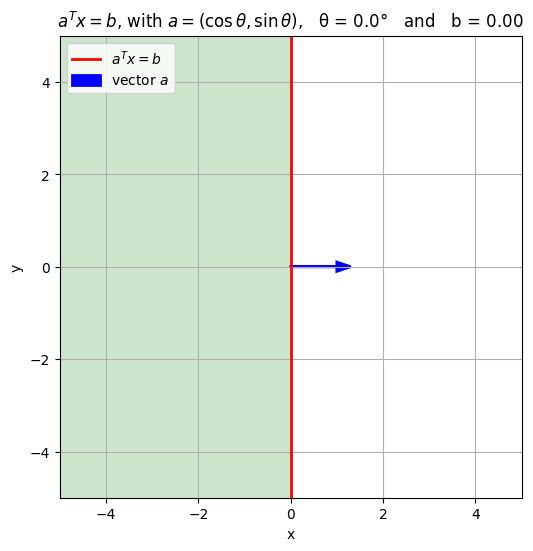

In [ ]:
#@title Interactive Hyperplane Illustration in R^2

import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, FloatSlider

fig, ax = plt.subplots(figsize=(6,6))

def plot_hyperplane(pars):
    """
    Plots in R^2:
      - The hyperplane (line) given by a^T x = b,
      - The unit vector a = [cos(theta), sin(theta)],
      - The half-space a^T x >= b (filled in yellow with alpha=0.5).

    Parameters:
      angle : float
          Angle (in degrees) determining the direction of the unit vector a.
      b : float
          The scalar in the hyperplane equation a^T x = b.
    """
    angle, b = pars
    ax.cla()
    # Convert angle from degrees to radians.
    theta = np.deg2rad(angle)
    a = np.array([np.cos(theta), np.sin(theta)])

    # Set up the plot limits.
    L = 5
    ax.set_xlim(-L, L)
    ax.set_ylim(-L, L)
    ax.set_aspect('equal', 'box')

    # Create a mesh grid for filling the half-space.
    x_vals = np.linspace(-L, L, 200)
    y_vals = np.linspace(-L, L, 200)
    X, Y = np.meshgrid(x_vals, y_vals)
    F = a[0]*X + a[1]*Y  # This computes a^T x for each (x,y)

    # Fill the half-space where a^T x >= b.
    # The levels ensure that the region F in [b, F_max] is colored.
    ax.contourf(X, Y, F, levels=[F.min(), b], colors=['green'], alpha=0.2)

    # Plot the hyperplane: a^T x = b.
    # For a non-vertical line (|a[1]| > 1e-6), solve for y.
    if np.abs(a[1]) > 1e-6:
        x_line = np.linspace(-L, L, 200)
        y_line = (b - a[0]*x_line) / a[1]
        ax.plot(x_line, y_line, 'r-', lw=2, label=r'$a^T x = b$')
    else:
        # Vertical line: x = b / a[0]
        x_vert = b / a[0]
        ax.plot([x_vert, x_vert], [-L, L], 'r-', lw=2, label=r'$a^T x = b$')

    # Plot the vector a (starting from the origin) as a blue arrow.
    ax.arrow(0, 0, a[0], a[1], head_width=0.2, head_length=0.3,
             fc='blue', ec='blue', lw=2, label=r'vector $a$')

    # Add labels and title.
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(r'$a^T x = b$, with $a=(\cos\theta,\sin\theta)$,'
                 f'   θ = {angle:.1f}°   and   b = {b:.2f}')
    ax.legend(loc='upper left')
    ax.grid(True)
    #plt.show()

# Create interactive sliders:
#interact(plot_hyperplane,
#         angle=FloatSlider(min=0, max=360, step=1, value=45, description='Angle (deg)'),
#         b=FloatSlider(min=-5, max=5, step=0.1, value=0, description='b'));

frames = 50
angles = np.hstack([np.linspace(0, 120, frames), np.flip(np.linspace(0, 120, frames))])
angles = np.hstack([angles, angles])

bs = np.hstack([np.linspace(0, 3, frames*2)])
bs = np.hstack([bs, np.flip(bs)])
pars = np.vstack([angles, bs]).T


ani = animation.FuncAnimation(fig, plot_hyperplane, frames=pars, interval=100)

# Display the animation as an HTML5 video.
HTML(ani.to_html5_video())
